In [2]:
# -*- coding: utf-8 -*-
"""
The script reads monthly average temperatures data for Helsinki. Then monthly
average temperatures sorts into special empty DataFrame for each season in each year.
"""

'\nThe script reads monthly average temperatures data for Helsinki. Then monthly\naverage temperatures sorts into special empty DataFrame for each season in each year.\n'

In [4]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Read file
dataHel = pd.read_csv('data/helsinki.csv', usecols=['YM', 'TAVG_Celsius', 'avgTempsC', 'Diff'])

# Convert column to datetime type
dataHel['YM'] = pd.to_datetime(dataHel['YM'], format='%Y%m') 

In [34]:
# Set datetime index
dataHel= dataHel.set_index('YM')

# Create time index
timeindex = pd.date_range('1953', '2016', freq= 'AS')

# Create empty DataFrame
seasonalData = pd.DataFrame(index= timeindex, columns=['Winter', 'Spring', 'Summer', 'Fall'])

In [35]:
# Loop seasons and fill DataFrame
for i in range(1953, 2017):
    winter = dataHel[str(i-1)+'-12-01':str(i)+'-02-01'].mean()
    spring = dataHel[str(i)+'-03-01':str(i)+'-05-01'].mean()
    summer = dataHel[str(i)+'-06-01':str(i)+'-08-01'].mean()
    fall = dataHel[str(i)+'-09-01':str(i)+'-11-01'].mean()
    seasonalData.loc[str(i)+'-01-01', ['Winter']] = winter['Diff']
    seasonalData.loc[str(i)+'-01-01', ['Spring']] = spring['Diff']
    seasonalData.loc[str(i)+'-01-01', ['Summer']] = summer['Diff']
    seasonalData.loc[str(i)+'-01-01', ['Fall']] = fall['Diff']

In [36]:
seasonalData.head()

,Winter,Spring,Summer,Fall
1953-01-01,0.0217936,1.69893,0.995264,1.03317
1954-01-01,-0.951627,1.16297,-0.0815793,0.446649
1955-01-01,1.07312,-2.93222,0.693185,0.875663
1956-01-01,-5.57967,-1.40834,-0.817554,-2.27738
1957-01-01,2.87492,-1.82812,-0.21123,0.221271


In [37]:
seasonalData.index.year

Int64Index([1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
            1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
            1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
            1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64')

In [39]:
# Create a new DataFrame 
seasonalData_v2 = pd.DataFrame()
seasonalData_v2 = seasonalData
# Create 'year' column
seasonalData_v2['year'] = seasonalData.index.year
# Reorder columns

# Print Sample
seasonalData_v2.head()

,Winter,Spring,Summer,Fall,year
1953-01-01,0.0217936,1.69893,0.995264,1.03317,1953
1954-01-01,-0.951627,1.16297,-0.0815793,0.446649,1954
1955-01-01,1.07312,-2.93222,0.693185,0.875663,1955
1956-01-01,-5.57967,-1.40834,-0.817554,-2.27738,1956
1957-01-01,2.87492,-1.82812,-0.21123,0.221271,1957


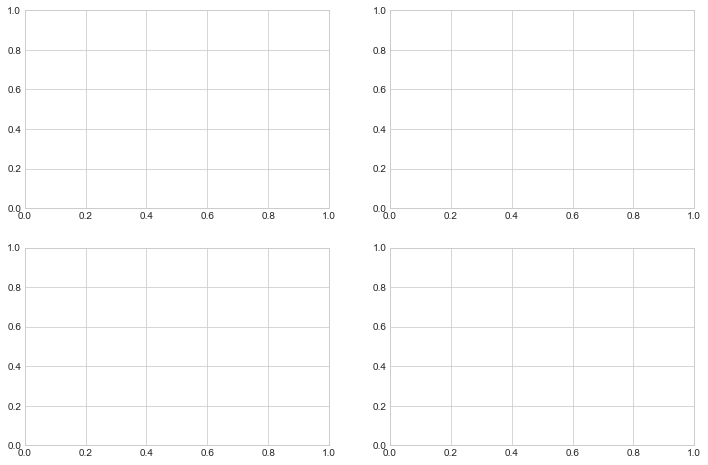

In [18]:
# Change style of plots
plt.style.use('seaborn-whitegrid')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Create variables of subplots
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

# Create array of y-ticks
yticks = np.arange(start=-5, stop=6, step=2.5)

In [41]:
# Create subplots
seasonalData_v2.plot(x=seasonalData_v2['year'], y='Winter', ax=ax11, c='blue', legend=False, lw=2.5, ylim=(-7, 7), xlim=('1950','2019'))
# seasonalData.plot(x=seasonalData.index, y='Spring', ax=ax12, c='blue', legend=False, lw=2.5, ylim=(-7, 7), xlim=('1950','2019'))
# seasonalData.plot(x=seasonalData.index, y='Summer', ax=ax21, c='blue', legend=False, lw=2.5, ylim=(-7, 7), xlim=('1950','2019'))
# seasonalData.plot(x=seasonalData.index, y='Fall', ax=ax22, c='blue', legend=False, lw=2.5, ylim=(-7, 7), xlim=('1950','2019'))


KeyError: "None of [Int64Index([1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,\n            1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,\n            1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,\n            1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,\n            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,\n            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],\n           dtype='int64')] are in the [columns]"